In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as syop
from matplotlib import rcParams
import matplotlib.gridspec as gridspec
import matplotlib.font_manager as fm

In [2]:
# Define the Gaussian function
def Gauss(x, y_miu, mu, sigma):
    y = y_miu*np.exp(-1*(((x-mu)**2)/(2*sigma**2)))
    return y


In [3]:
# Define the Lognormal function
def Lognormal(x, y_miu, mu, sigma):
    y = y_miu * (mu / x) * np.exp(-((np.log(x) - np.log(mu))**2)/(2 * sigma**2))
    return y

In [4]:
# Define the Laplacian function
def Laplacian(x, y_miu, mu,sigma):
    y = y_miu*np.exp(-1*((np.abs(x-mu))/sigma))
    return y

In [5]:
def Reduced_Chi_Squared(x, y, f, dy, mu, y_mu, stdev):
    return np.sum(((y - f(x, mu, y_mu, stdev))**2)/((len(x) - 3) * dy**2))

C:\Users\andre\AppData\Local\Temp\ipykernel_3208\322367776.py:3: RuntimeWarning: invalid value encountered in log
  y = y_miu * (mu / x) * np.exp(-((np.log(x) - np.log(mu))**2)/(2 * sigma**2))


0.9911778941632793
lognormal:  [118.05480547  25.98474824   0.21013702]


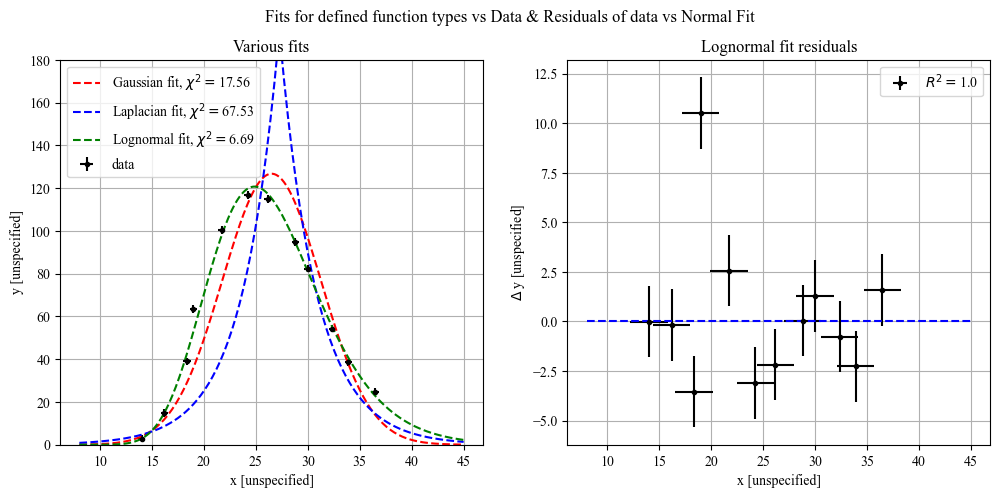

In [6]:
X = [13.99,21.7,24.25,33.89,18.35,28.79,36.47,26.16,18.98,29.99,16.19,32.35]
Y = [2.84,100.43,116.73,38.45,38.93,94.64,24.49,115.03,63.4,82.33,14.84,54.29]
    

cal = np.array([17.28, 17.45, 17.53, 17.69, 17.81, 17.72, 17.66])

d_cal = np.std([17.28, 17.45, 17.53, 17.69, 17.81, 17.72]) # taking variance of box measurements as measurement uncertainty
d_cal = np.round(d_cal, 1)/10
cal_val = 25.00/(np.mean(cal))
    
X = np.asarray(X)
Y = np.asarray(Y)

dX = np.sqrt(
                    (25 *  d_cal/ cal_val)**2 + 
                    (25 * X * d_cal/ cal_val**2)**2
    )

dY = np.sqrt(
                    (25 * d_cal/ cal_val)**2 + 
                    (25 * Y * d_cal/ cal_val**2)**2
    )

# models and plotting
rcParams['font.family'] = "Times New Roman"
rcParams['font.weight'] = "book"
    
fig = plt.figure(figsize=(12, 5))
fig.suptitle("Fits for defined function types vs Data & Residuals of data vs Normal Fit")

gs = gridspec.GridSpec(1, 2, hspace=0.3)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

#ax.scatter(X, Y, color = 'black')
ax1.errorbar(X, Y, 1.8, 0.36, fmt = '.k', label = 'data')
x =  np.linspace(8, 45, 200)
# models
    
# normal
norm_popt, norm_pcov = syop.curve_fit(f = Gauss, xdata = X, ydata = Y, p0 = [26.5, 4.7, 126.7], sigma = dY)
norm_perr = np.sqrt(np.diag(norm_pcov))
ax1.plot(x, Gauss(x, norm_popt[0], norm_popt[1], norm_popt[2]), color = 'red', linestyle= 'dashed', label = 'Gaussian fit, $ \chi^2 =$' + str(np.round(Reduced_Chi_Squared(X, Y, Gauss, 3.8, norm_popt[0], norm_popt[1], norm_popt[2]), 2)))
    
    
# laplacian
lpc_popt, lpc_pcov = syop.curve_fit(f = Laplacian, xdata = X, ydata = Y, p0 = [27.2, 3.6, 180], sigma = dY)
lpc_perr = np.sqrt(np.diag(lpc_pcov))
ax1.plot(x, Laplacian(x, lpc_popt[0], lpc_popt[1], lpc_popt[2]), color = 'blue', linestyle = 'dashed', label = 'Laplacian fit, $ \chi^2=$' + str(np.round(Reduced_Chi_Squared(X, Y, Laplacian, 3.9, lpc_popt[0], lpc_popt[1], lpc_popt[2]), 2)))


#lognormal
lnorm_popt, lnorm_pcov = syop.curve_fit(f = Lognormal, xdata = X, ydata = Y, p0 = [11.5,195.6,5.], sigma = dY)
lnorm_perr = np.sqrt(np.diag(lnorm_pcov))
ax1.plot(x, Lognormal(x, lnorm_popt[0], lnorm_popt[1], lnorm_popt[2]), color = 'green', linestyle = 'dashed', label = 'Lognormal fit, $ \chi^2 =$' + str(np.round(Reduced_Chi_Squared(X, Y, Lognormal, 1.6, lnorm_popt[0], lnorm_popt[1], lnorm_popt[2]), 2)))
ax1.set_ylim([0, 180])
ax1.legend()
ax1.grid()
ax1.set_xlabel('x [unspecified]')
ax1.set_ylabel('y [unspecified]')
ax1.set_title('Various fits')
    
#R value
actual = Y
predict = Lognormal(X, lnorm_popt[0], lnorm_popt[1], lnorm_popt[2])
 
corr_matrix = np.corrcoef(actual, predict)
corr = corr_matrix[0,1]
R_sq = corr**2

print(R_sq)

print('lognormal: ', lnorm_popt)

    
    
ax2.errorbar(X, Y - Lognormal(X, lnorm_popt[0], lnorm_popt[1], lnorm_popt[2]),1.8, 1.8, fmt = '.k', label = '$R^2 =$' + str(np.round(R_sq)))
ax2.plot(x, np.zeros_like(x), color = 'blue', linestyle = 'dashed')
ax2.set_xlabel('x [unspecified]')
ax2.set_ylabel('$\Delta$ y [unspecified]')
ax2.set_title('Lognormal fit residuals')
ax2.legend()
ax2.grid()

plt.show()
 

In [28]:
#Chi squared stuff
import scipy.integrate as integrate
import scipy.special as special
from scipy.stats import chi2


CDF = 1-chi2.cdf(6.69,12)

print(CDF)

0.8774015432426066
